<a href="https://colab.research.google.com/github/kopalgarg/time_series_explainability/blob/master/time_series_explainability_simulations_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 

Spike dataset

In [ ]:
with open('x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
with open('gt_train.pkl', 'rb') as f:
    gt_train = pickle.load(f)
with open('gt_test.pkl', 'rb') as f:
    gt_test = pickle.load(f)
with open('fit_test_importance_scores_0.pkl', "rb") as fh:
  importance_scores = pickle.load(fh)
with open('fit_test_ranked_scores.pkl', "rb") as fh:
  ranked_scores = pickle.load(fh)

print(x_train.shape)
print(y_train.shape)

(2400, 3, 80)
(2400, 80)


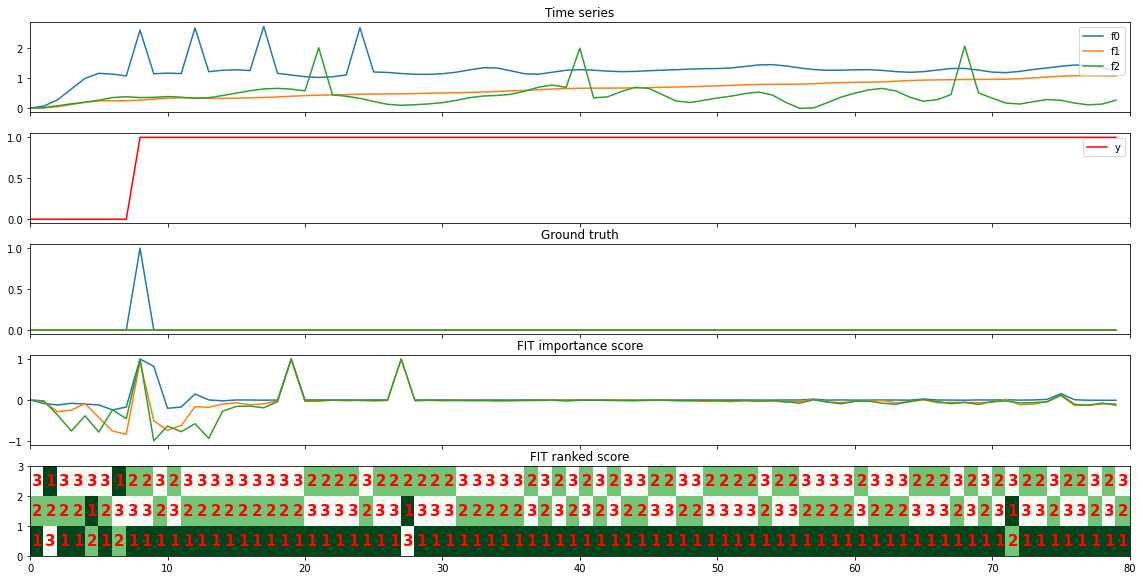

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1 ,sharex='col')
f.set_figheight(8)
f.set_figwidth(16)
f.tight_layout()

# sample number
i=69 #63,

feature_map_mimic = ['f0', 'f1', 'f2']
for nn, idx in enumerate(range(len(feature_map_mimic))):
    ax1.plot(x_test[i,idx,:], 
             label=feature_map_mimic[idx])
    ax1.set_title('Time series')

    ax3.plot(range(gt_test.shape[2]), gt_test[i,idx,:], 
             label=feature_map_mimic[idx])
    ax3.set_title('Ground truth')

    ax4.plot(range(importance_scores.shape[2]), 
             importance_scores[i,idx,:], 
             label=feature_map_mimic[idx])
    ax4.set_title('FIT importance score')

ax2.plot(y_test[i], label = 'y', color = 'red')
plot_heatmap_text(ranked_scores=ranked_scores[i,:,:], ax = ax5)
ax5.set_title('FIT ranked score')
ax2.legend();
ax1.legend(loc='upper right');

State dataset

In [ ]:
with open('state_dataset_x_train.pkl', 'rb') as f:
    state_x_train = pickle.load(f)
with open('state_dataset_y_train.pkl', 'rb') as f:
    state_y_train = pickle.load(f)
with open('state_dataset_x_test.pkl', 'rb') as f:
    state_x_test = pickle.load(f)
with open('state_dataset_y_test.pkl', 'rb') as f:
    state_y_test = pickle.load(f)

with open('state_dataset_importance_test.pkl', 'rb') as f:
    state_dataset_importance_test = pickle.load(f)
with open('state_dataset_importance_train.pkl', 'rb') as f:
    state_dataset_importance_train = pickle.load(f)

with open('state_dataset_logits_test.pkl', 'rb') as f:
    state_dataset_logits_test = pickle.load(f)
with open('state_dataset_logits_train.pkl', 'rb') as f:
    state_dataset_logits_train = pickle.load(f)

with open('state_dataset_states_test.pkl', 'rb') as f:
    state_dataset_states_test = pickle.load(f)
with open('state_dataset_states_train.pkl', 'rb') as f:
    state_dataset_states_train = pickle.load(f)

with open('fit_test_importance_scores_0.pkl', 'rb') as f:
    state_importance_scores = pickle.load(f)

with open('fit_test_ranked_scores.pkl', 'rb') as f:
    state_ranked_scores = pickle.load(f)

print(state_x_train.shape)
print(state_y_train.shape)

(800, 3, 100)
(800, 100)


In [ ]:
# from https://github.com/sanatonek/time_series_explainability/blob/c9f8e5ccd993cda5d3ed695dbef350810a6aca83/TSX/utils.py
def shade_state_state_data(state_subj, t, ax):
    # Shade the state on simulation data plots
    for ttt in range(t[0], len(t)):
        if state_subj[ttt] == 0:
            ax.axvspan(ttt + 1, ttt, facecolor='blue', alpha=0.2)
        elif state_subj[ttt] == 1:
            ax.axvspan(ttt + 1, ttt, facecolor='green', alpha=0.2)
        elif state_subj[ttt] == 2:
            ax.axvspan(ttt + 1, ttt, facecolor='orange', alpha=0.2)
def plot_heatmap_text(ranked_scores, ax):
    # assumes same shape of ranked scores and scores
    heatmap = ax.pcolormesh(-ranked_scores,cmap=matplotlib.cm.Greens)
    for y in range(ranked_scores.shape[0]):
        for x in range(ranked_scores.shape[1]):
            ax.text(x +.5 , y +.5 , '%d' % ranked_scores[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',fontsize=15,color='r',fontweight='bold')

Text(0.5, 1.0, 'FIT ranked score')

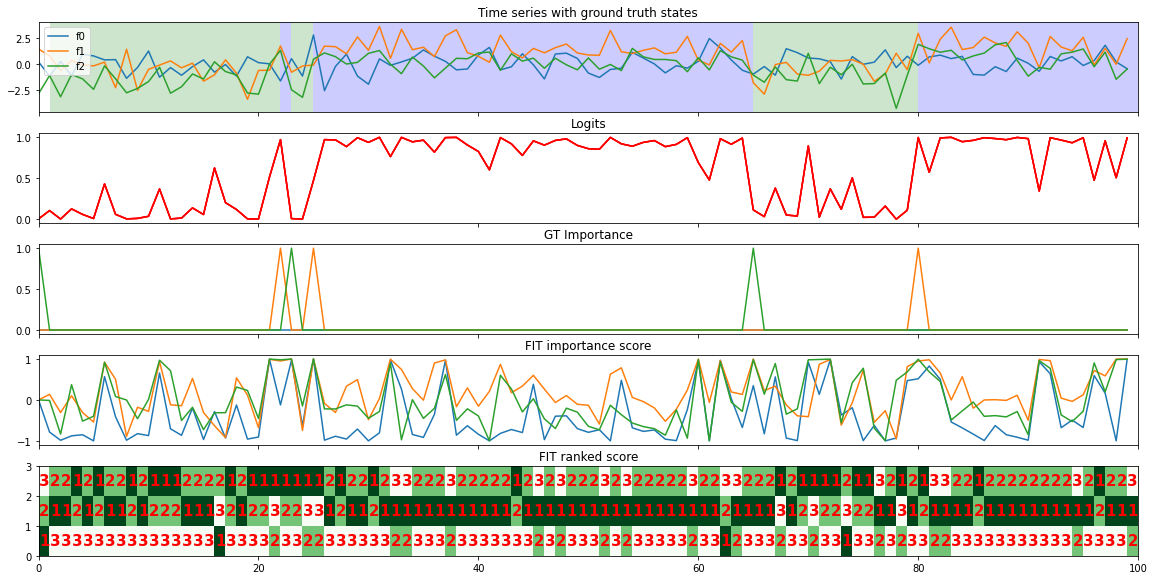

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1 ,sharex='col')
f.set_figheight(8)
f.set_figwidth(16)
f.tight_layout()

# sample number
i=1 #1, 2, 3

for nn, idx in enumerate(range(len(feature_map_mimic))):
    ax1.plot(state_x_test[i,idx,:], 
             label=feature_map_mimic[idx])
    ax1.set_title('Time series with ground truth states')

    ax2.plot(state_dataset_logits_test[i,:], 
             label='logits', color = 'red')
    ax2.set_title('Logits')

    ax3.plot(state_dataset_importance_test[i,idx,:], 
             label=feature_map_mimic[idx])
    ax3.set_title('GT Importance')

    ax4.plot(range(state_importance_scores.shape[2]), 
             state_importance_scores[i,idx,:], 
             label=feature_map_mimic[idx])
    ax4.set_title('FIT importance score')

ax1.legend();
shade_state_state_data(ax = ax1, t=state_dataset_states_test[i,:], state_subj=state_dataset_states_test[i,:])
plot_heatmap_text(ranked_scores=state_ranked_scores[i,:,:],ax = ax5)
ax5.set_title('FIT ranked score')

